In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_preprocessing import *
%reload_ext autoreload
%autoreload 2

In [115]:
#loading the data
#df_trade = pd.read_parquet('data/clean/vwap/trade/2007-01-01-to-2007-01-31-vwap-trade-1min.parquet')
from upload_data import upload_clean_data


df_trade = upload_clean_data('data/clean/vwap/trade')

In [116]:
#rename column minute into time
df_trade.rename(columns={'minute':'time'}, inplace=True)
#set index to datetime
df_trade['time'] = pd.to_datetime(df_trade['time'])
df_trade.set_index('time', inplace=True)

# Create a pivot table with the count of VWAP values for each ticker and minute
df_trade_pivot = df_trade.pivot_table(index='time', columns='ticker', values='vwap')
df_trade_pivot

ticker,AA.N,ABT.N,AEP.N,ALL.N,AVP.N,AXP.N,BA.N,BAC.N,BAX.N,BHI.N,...,UTX.N,V.N,VZ.N,WAG.N,WFC.N,WMB.N,WMT.N,WY.N,XOM.N,XRX.N
time,,,,,,,,,,,,,,,,,,,,,
2007-01-03 14:30:00,NaN,48.833295,NaN,65.136305,32.915633,NaN,88.990662,53.296366,46.399533,NaN,...,62.607905,NaN,NaN,45.898943,NaN,NaN,47.100020,NaN,NaN,16.969097
2007-01-03 14:31:00,29.886544,48.924805,42.493664,65.287679,33.012088,NaN,88.969032,53.318827,46.476087,NaN,...,62.950885,NaN,NaN,46.174609,NaN,NaN,47.132193,NaN,NaN,16.979139
2007-01-03 14:32:00,29.902933,48.979192,42.512895,65.470427,33.068729,NaN,89.201183,53.340640,46.495968,NaN,...,62.945503,NaN,NaN,46.298085,NaN,25.999167,47.158139,71.058492,75.669337,17.017634
2007-01-03 14:33:00,29.950623,48.998300,42.605600,65.631029,33.128783,NaN,89.462869,53.402308,46.647692,73.626691,...,62.979286,NaN,NaN,46.351843,NaN,25.889940,47.265910,71.283016,75.703973,17.060000
2007-01-03 14:34:00,29.979737,48.979465,42.672500,65.646750,33.136750,NaN,89.332162,53.558971,46.694630,73.079487,...,62.974128,NaN,37.953035,46.299185,NaN,25.767747,47.399939,71.465120,75.514586,17.066284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31 20:55:00,11.364563,53.463941,33.272449,NaN,24.016787,18.588940,42.688663,13.970381,53.646136,32.101680,...,53.738634,52.210928,34.001420,24.650009,29.877718,14.501777,56.099799,30.606049,79.720567,7.993205
2008-12-31 20:56:00,11.355596,53.567524,33.328187,NaN,24.073611,18.614909,42.732132,13.999076,53.781818,32.134105,...,53.742738,52.335472,34.072811,24.703315,29.940812,14.533825,56.205586,30.622850,79.896611,8.006225
2008-12-31 20:57:00,11.332838,53.623673,33.325408,NaN,24.084695,18.641060,42.786829,14.032783,53.755155,32.174520,...,53.751047,52.356329,34.112874,24.704581,29.998997,14.544687,56.224567,30.603650,79.946278,8.001739


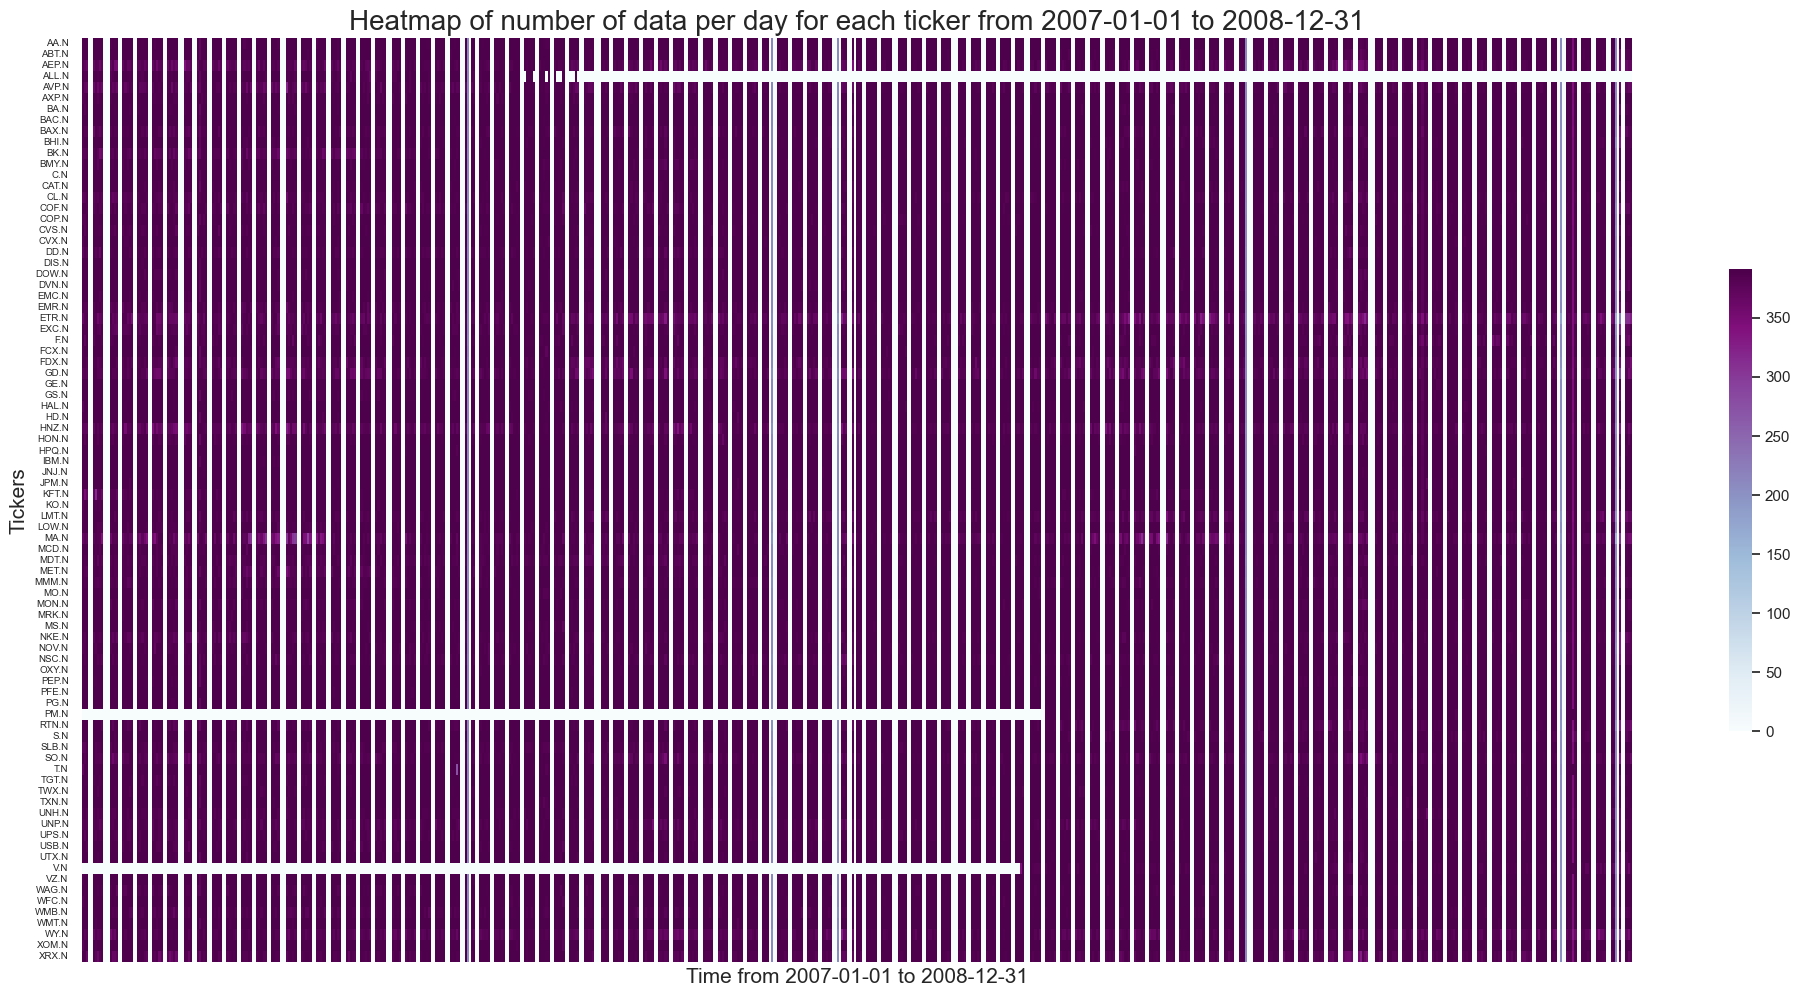

In [122]:
from tkinter import font
import matplotlib.ticker as ticker
daily_data_count = df_trade_pivot.resample('D').count() 
sns.set(font_scale=1)
# Use the count of data points as values for the heatmap
# If there's no data for a day, it will be NaN, which will be shown as a white space in the heatmap
pivot_table = daily_data_count.transpose()

# Create the heatmap

# Create the heatmap with figsize adjusted for better visibility
plt.figure(figsize=(25, 12))
ax = sns.heatmap(pivot_table, cmap="BuPu", linewidths=0, linecolor=None, cbar_kws={"shrink": .5}, yticklabels=True, xticklabels=False)

#increse font x and y labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xlabel('Time from 2007-01-01 to 2008-12-31', fontsize=15)
ax.set_ylabel('Tickers', fontsize=15)

plt.title('Heatmap of number of data per day for each ticker from 2007-01-01 to 2008-12-31', fontsize=20)

plt.show()



From the heat-map, we see that ALL.N, PM.N and V.N do not have complete data, so we drop them.

In [110]:
df_trade_pivot.drop(columns=['ALL.N', 'PM.N', 'V.N'], inplace=True)

In [77]:
#save to parquet
df_trade_pivot.to_parquet('data/clean/final/2007-2008-vwap-trade-1min.parquet')

We now count the average number of data point per day with data for every stock

In [78]:
# Calculate the number of data points per day for each stock
daily_data_count = df_trade_pivot.resample('D').count()

# Count the number of days with data for every stock
days_with_data = (daily_data_count > 0).sum()

# Calculate the average number of data points per day with data for every stock
average_data_points = daily_data_count.sum() / days_with_data

average_data_points.sort_values(ascending=False, inplace=True)
print(average_data_points)



ticker
GE.N     387.672619
PFE.N    387.523810
C.N      387.496032
HPQ.N    387.492063
IBM.N    387.474206
            ...    
WY.N     378.355159
GD.N     377.892857
HNZ.N    377.634921
MA.N     376.003968
ETR.N    373.251984
Length: 81, dtype: float64


In [79]:
#Minimum number of data points per day for each stock during the trading days
print(daily_data_count[daily_data_count>0].min().sort_values())

ticker
MA.N     150.0
ETR.N    155.0
WY.N     183.0
LMT.N    187.0
RTN.N    189.0
         ...  
HAL.N    207.0
KFT.N    207.0
EMR.N    208.0
OXY.N    208.0
T.N      211.0
Length: 81, dtype: float64


In [80]:
#Maximum number of data points per day for each stock during the trading days
print(daily_data_count[daily_data_count>0].max().sort_values())

ticker
AA.N     390.0
OXY.N    390.0
NSC.N    390.0
NOV.N    390.0
NKE.N    390.0
         ...  
HAL.N    391.0
GE.N     391.0
MDT.N    391.0
KO.N     391.0
GS.N     391.0
Length: 81, dtype: float64


Observations on the 2010 data.
We also create a heatmap and plot the same statistics as for the 2007-2008 data

#loading the 2010

In [127]:
#loading the 2010 clean data
df_2010 = pd.read_parquet('data/clean/final/SP500-2010.parquet')
df_2010.rename(columns={'index':'time'}, inplace=True)
df_2010['time'] = pd.to_datetime(df_2010['time'])
df_2010.set_index('time', inplace=True)
df_2010

,A,AA,AAP,ABC,ABD,ABT,ACE,ACL,ACN,ADI,...,WRB,WSH,WU,WY,XEC,XEL,XOM,XRX,YUM,ZMH
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04 14:31:00,30.96,16.41,40.47,26.09,7.31,54.15,50.40,158.60,41.52,31.76,...,24.64,26.50,18.98,43.62,53.44,21.18,68.67,8.53,35.10,59.17
2010-01-04 14:32:00,31.29,16.40,40.78,26.28,7.45,54.10,50.57,159.25,41.57,31.80,...,24.65,26.51,19.10,43.71,53.81,21.27,68.75,8.53,35.19,59.30
2010-01-04 14:33:00,31.32,16.45,40.80,26.30,7.41,53.98,50.55,160.01,41.73,31.85,...,24.70,26.50,19.14,43.53,53.98,21.28,68.77,8.50,35.24,59.27
2010-01-04 14:34:00,31.23,16.46,40.78,26.30,7.49,53.96,50.32,160.00,41.73,31.92,...,24.68,26.51,19.11,43.51,53.98,21.29,68.77,8.48,35.25,59.26
2010-01-04 14:35:00,31.22,16.46,40.76,26.27,7.49,53.92,50.34,160.23,41.70,31.89,...,24.68,26.50,19.10,43.50,54.03,21.18,68.81,8.47,35.20,59.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 20:57:00,41.41,15.39,66.25,34.10,8.51,47.87,62.26,163.28,48.49,37.67,...,27.39,34.63,18.57,18.92,88.75,23.53,73.07,11.52,49.06,53.73
2010-12-31 20:58:00,41.41,15.38,66.21,34.10,8.54,47.86,62.25,163.31,48.50,37.66,...,27.39,34.64,18.57,18.92,88.69,23.53,73.14,11.52,49.06,53.72
2010-12-31 20:59:00,41.41,15.38,66.19,34.10,8.56,47.86,62.27,163.27,48.49,37.67,...,27.39,34.69,18.57,18.93,88.68,23.53,73.14,11.52,49.05,53.72


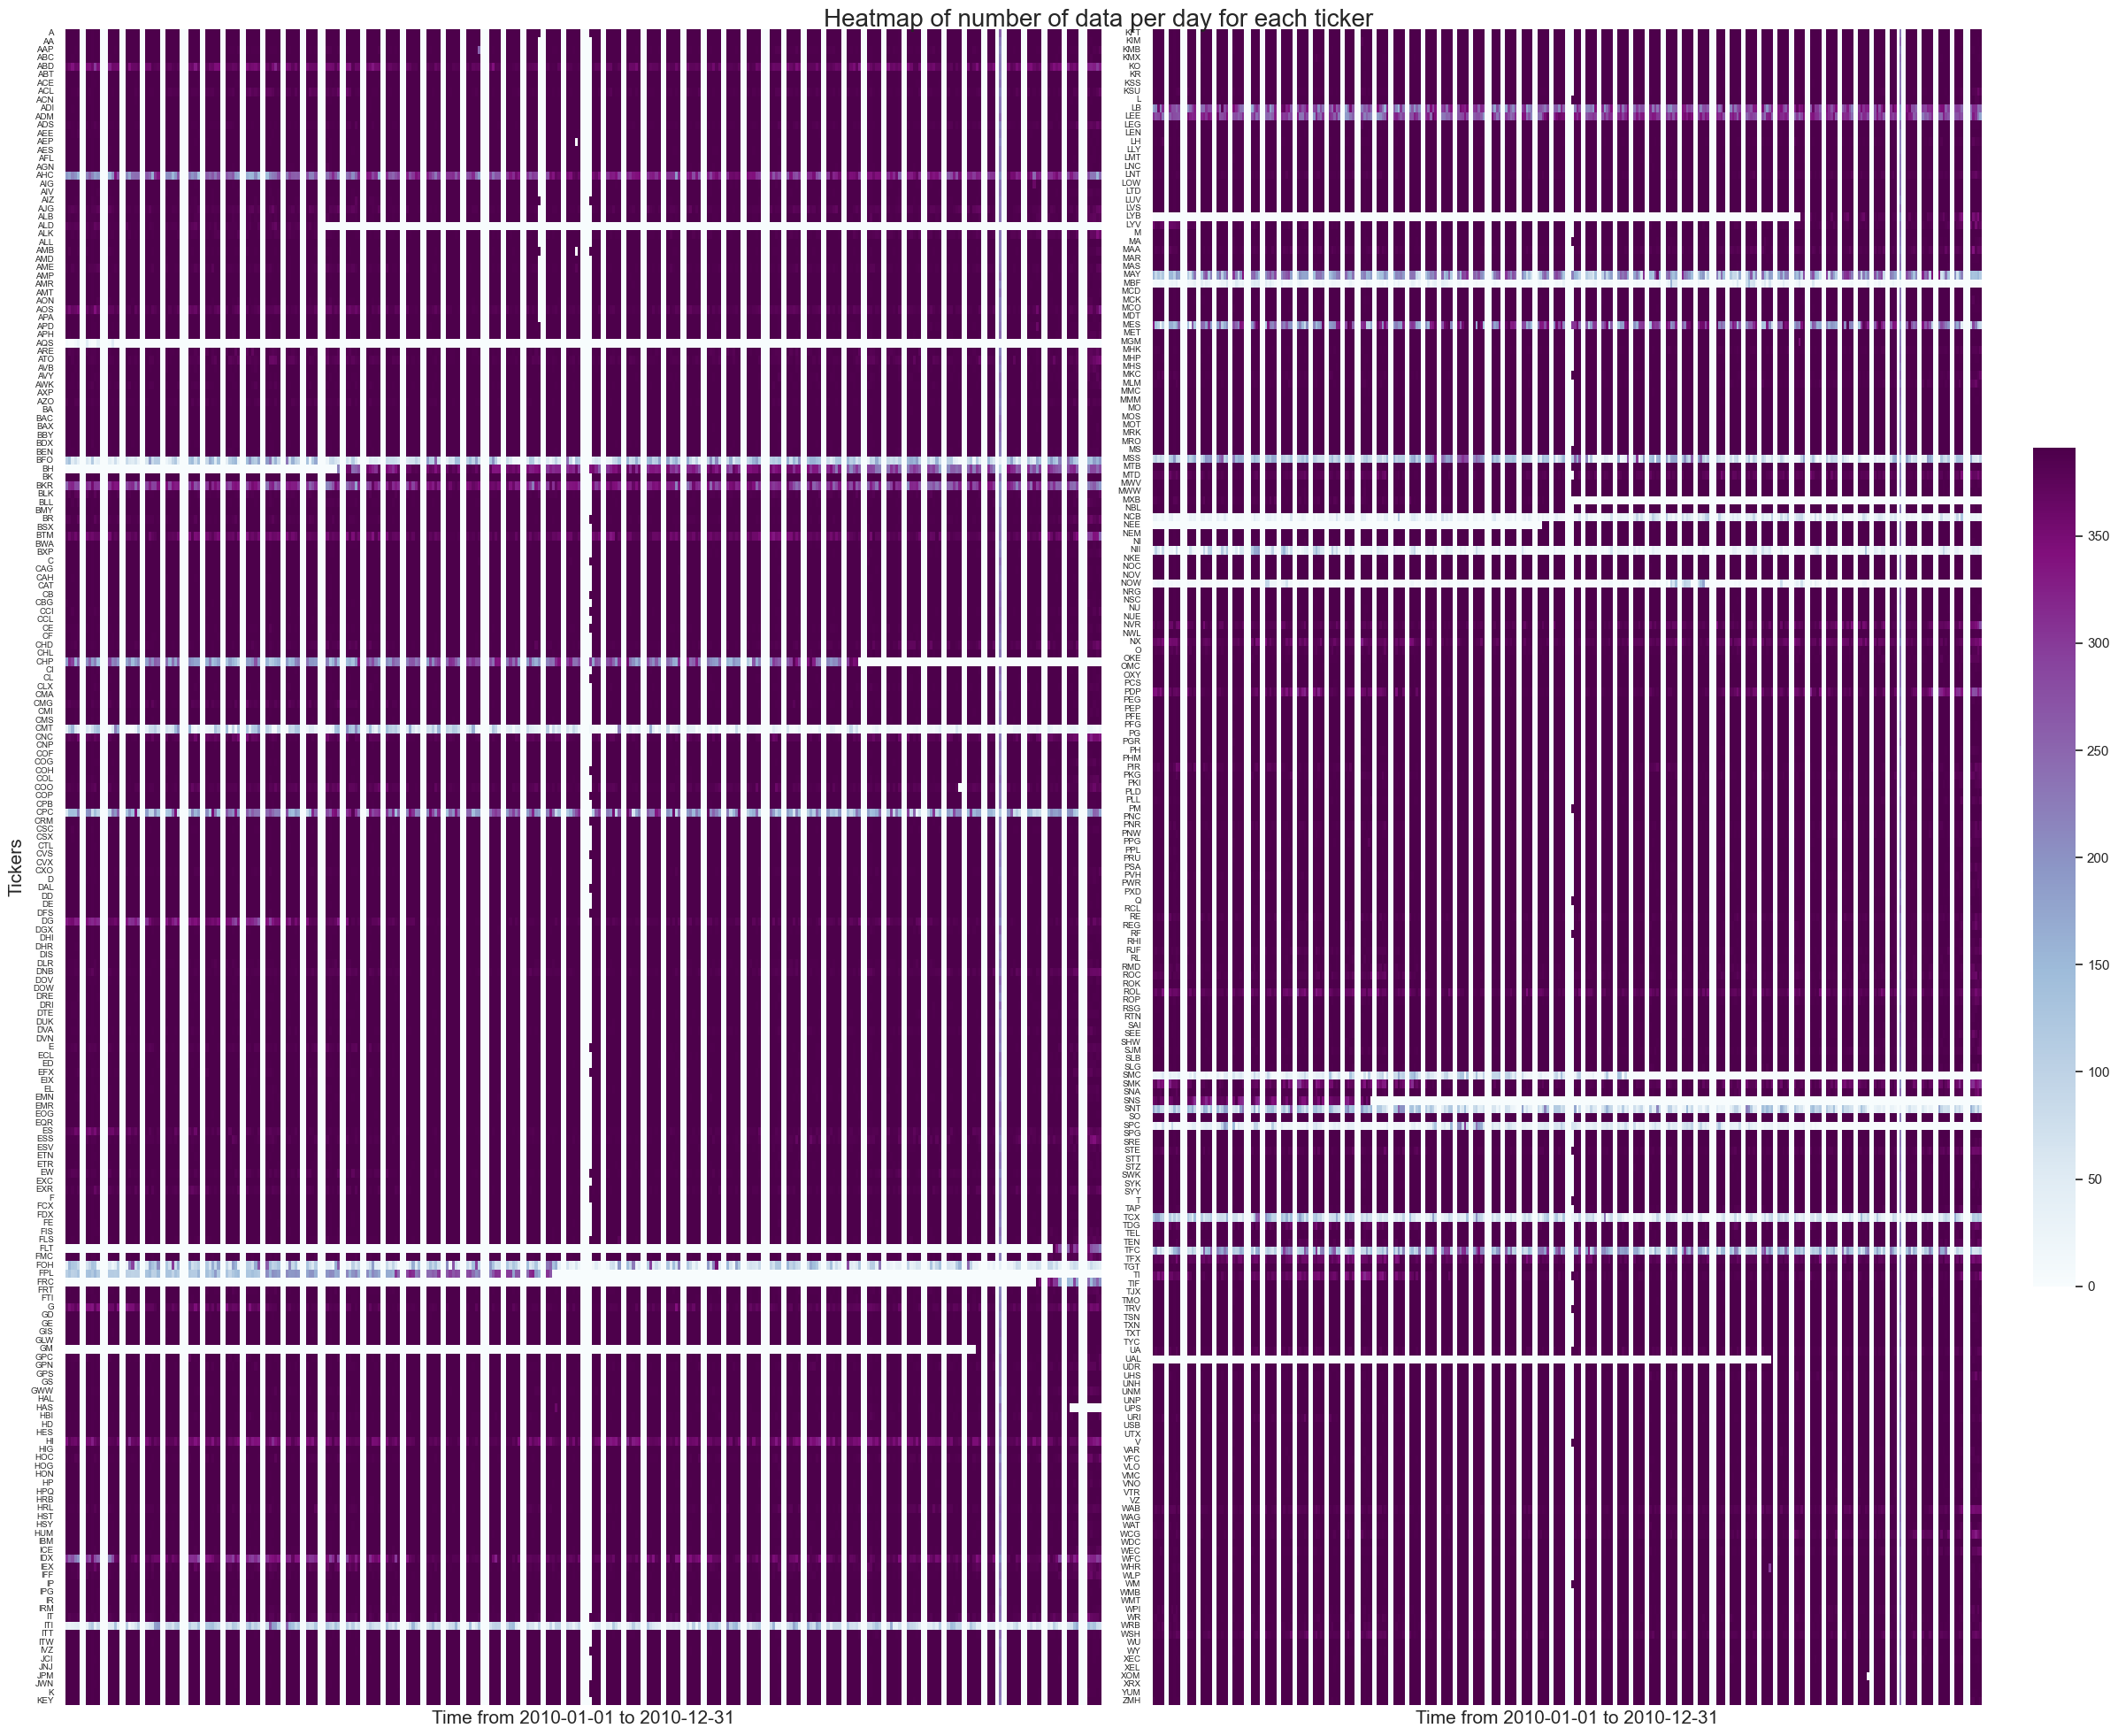

In [139]:
daily_data_count2 = df_2010.resample('D').count() 
sns.set(font_scale=1)
# Use the count of data points as values for the heatmap
# If there's no data for a day, it will be NaN, which will be shown as a white space in the heatmap
pivot_table2 = daily_data_count2.transpose()

first_half = pivot_table2.iloc[:len(pivot_table2)//2]
second_half = pivot_table2.iloc[len(pivot_table2)//2:]

# Set the font scale for seaborn
sns.set(font_scale=1)

# Create a figure to contain the subplots
plt.figure(figsize=(25, 20))

# Subplot 1 for the first half of tickers
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
ax1 = sns.heatmap(first_half, cmap="BuPu", linewidths=0, linecolor=None, cbar=False, yticklabels=True, xticklabels=False)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=7)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
ax1.set_xlabel('Time from 2010-01-01 to 2010-12-31', fontsize=15)
ax1.set_ylabel('Tickers', fontsize=15)

# Subplot 2 for the second half of tickers
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
ax2 = sns.heatmap(second_half, cmap="BuPu", linewidths=0, linecolor=None, cbar_kws={"shrink": .5}, yticklabels=True, xticklabels=False)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=7)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12)
ax2.set_xlabel('Time from 2010-01-01 to 2010-12-31', fontsize=15)
# Only set ylabel for the left plot to avoid repetition
plt.suptitle('Heatmap of number of data per day for each ticker', fontsize=20)

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()

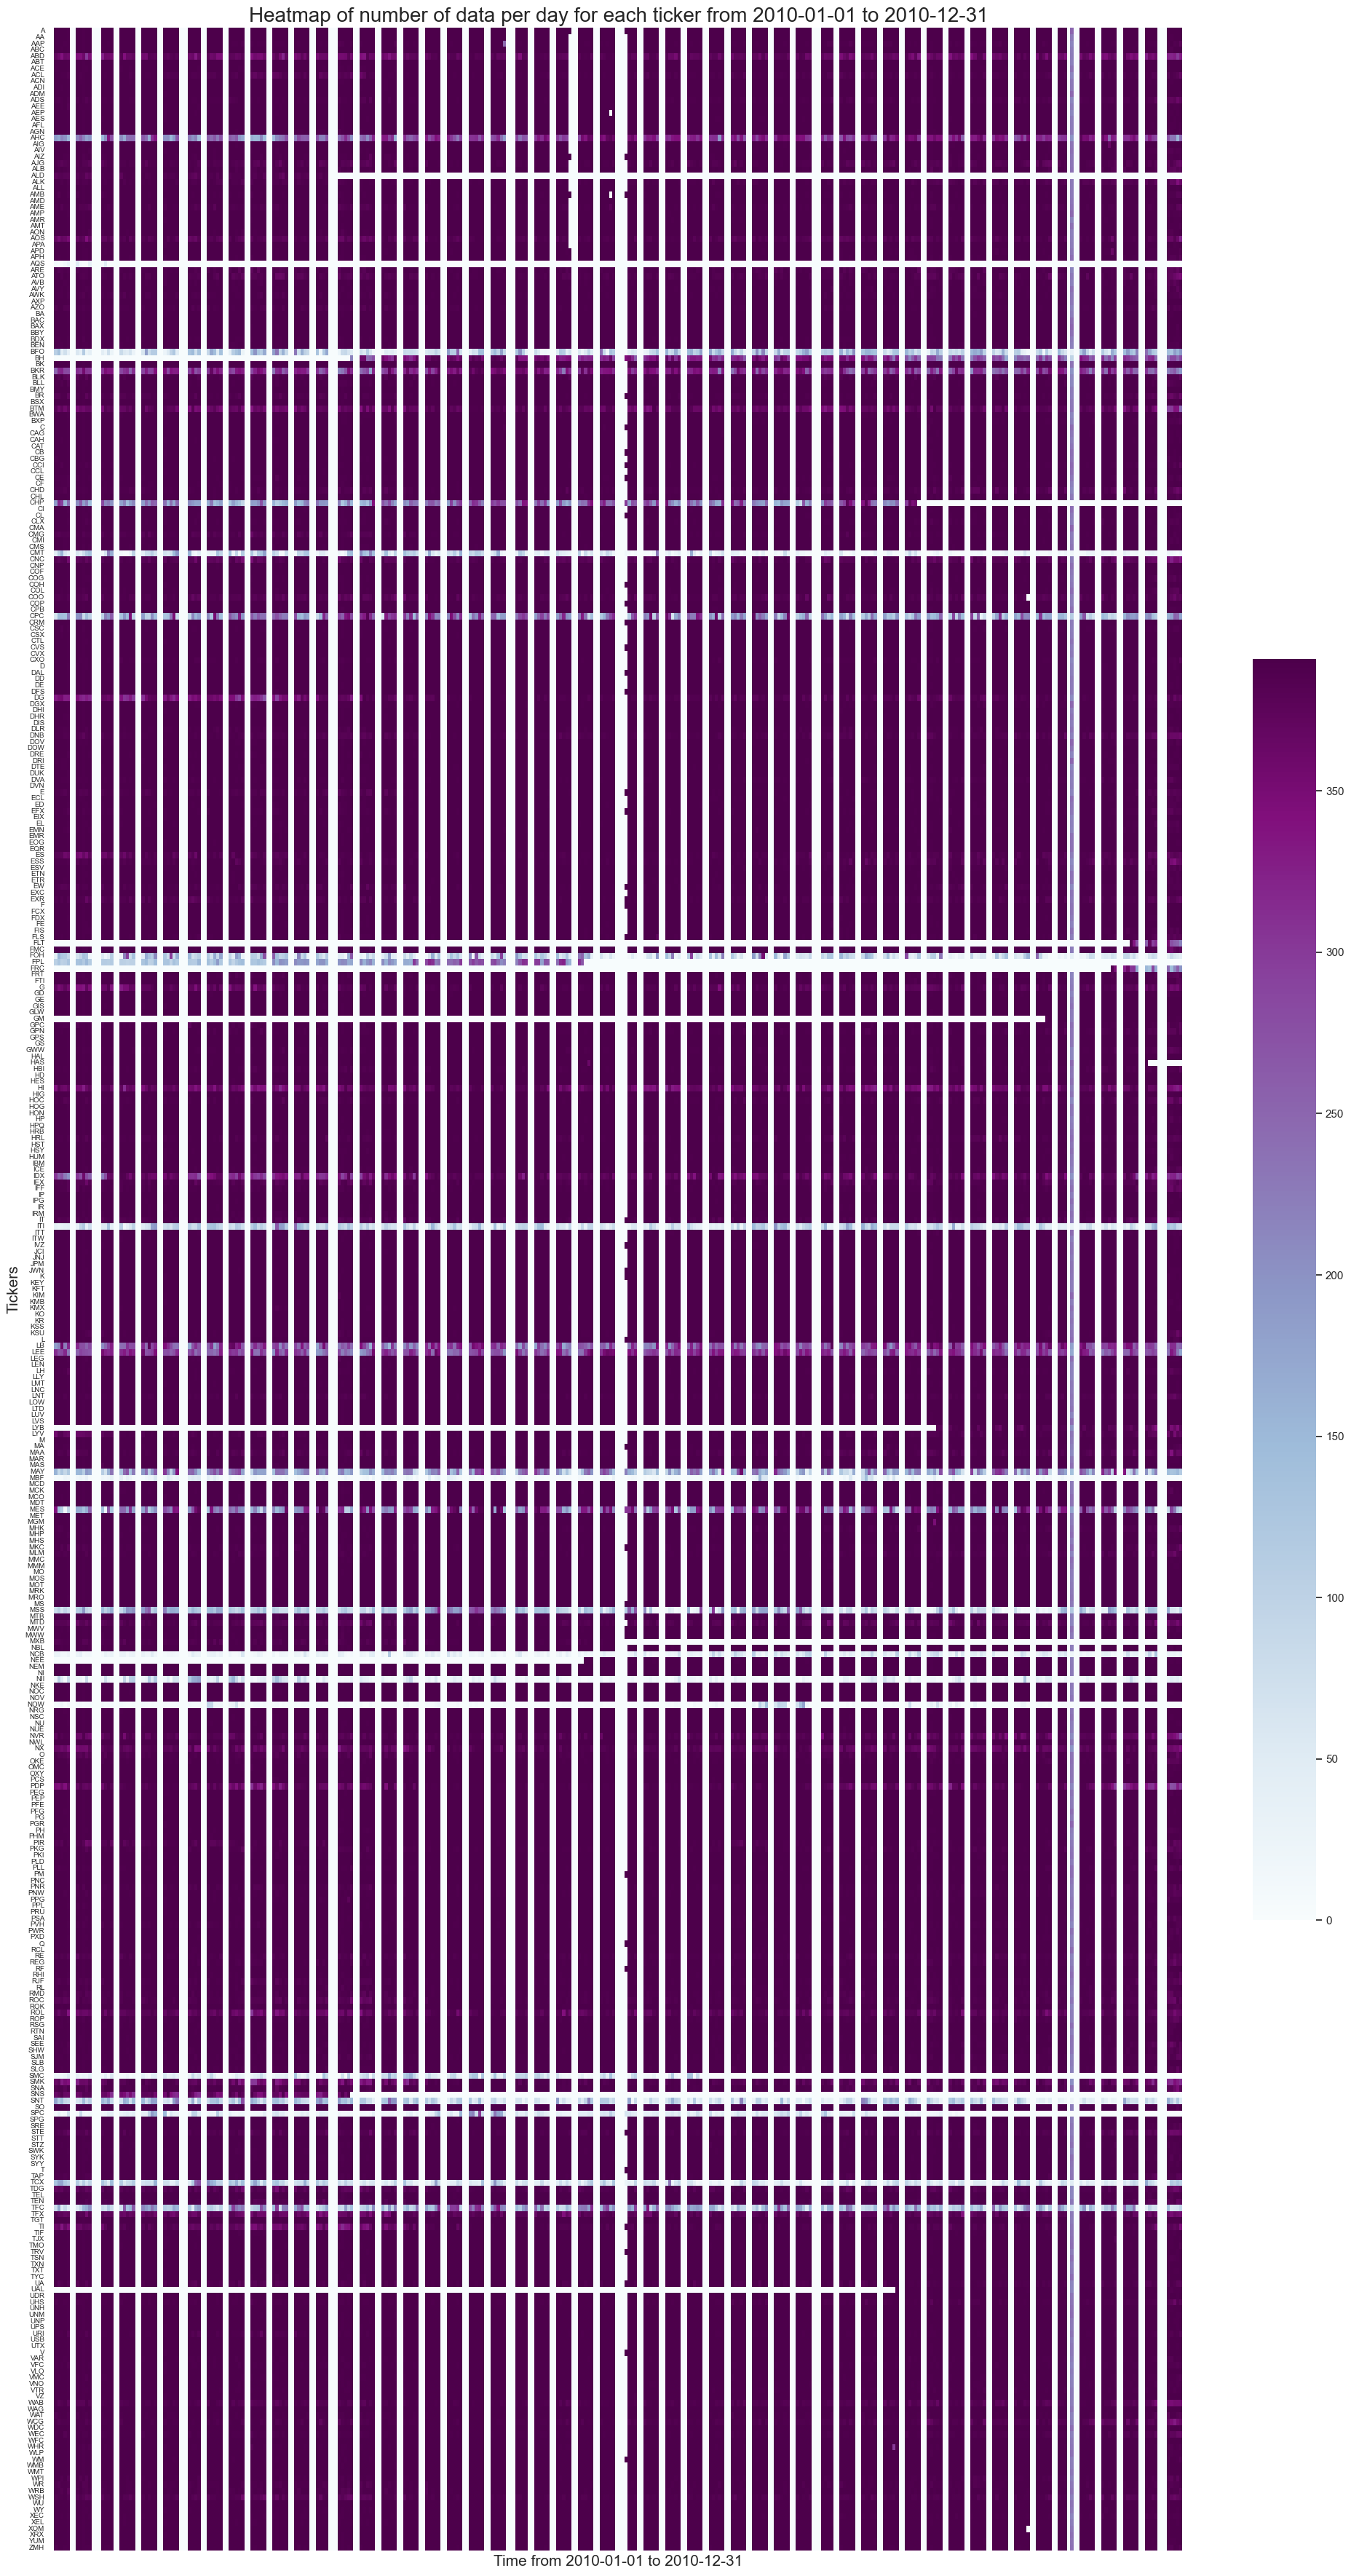

In [131]:
daily_data_count2 = df_2010.resample('D').count() 
sns.set(font_scale=1)
# Use the count of data points as values for the heatmap
# If there's no data for a day, it will be NaN, which will be shown as a white space in the heatmap
pivot_table2 = daily_data_count2.transpose()

# Create the heatmap

# Create the heatmap with figsize adjusted for better visibility
plt.figure(figsize=(25, 45))
ax = sns.heatmap(pivot_table2, cmap="BuPu", linewidths=0, linecolor=None, cbar_kws={"shrink": .5}, yticklabels=True, xticklabels=False)

#increse font x and y labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xlabel('Time from 2010-01-01 to 2010-12-31', fontsize=15)
ax.set_ylabel('Tickers', fontsize=15)

plt.title('Heatmap of number of data per day for each ticker from 2010-01-01 to 2010-12-31', fontsize=20)

plt.show()


In [132]:
#Keep only data with more than 90 000 data points over the whole year
df_2010_cut = df_2010.loc[:, (df_2010.count() > 90000)]
df_2010_cut.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98276 entries, 2010-01-04 14:31:00 to 2010-12-31 21:01:00
Columns: 366 entries, A to ZMH
dtypes: float64(366)
memory usage: 275.2 MB


In [133]:
#minimal number of trade per day per stock
daily_data_count_2010_cut = df_2010_cut.resample('D').count()
print(daily_data_count_2010_cut[daily_data_count_2010_cut>0].min().sort_values())

NX     198.0
SMK    202.0
NVR    209.0
ESS    210.0
MAA    210.0
       ...  
DOV    249.0
CMA    250.0
DRI    250.0
BAX    250.0
A      252.0
Length: 366, dtype: float64


Comparison of the performance of the preprocessing of the cleaned files with Pandas and Vaex for 1 month file file (February 2007, 30 MB)

In [12]:
dirBase="E:/FinancialData/sp100_2004-8/clean/US/test"
dirSaveBase="E:/FinancialData/sp100_2004-8/clean/vwap/trade/test_bin"

In [15]:
%%time
#computing vwap for January 2007 using pandas
save_vwap_trade_pandas(dirBase = dirBase, dirSaveBase = dirSaveBase)

Calculating and saving 1min-vwap for all available clean trade files


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\data_preprocessing.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trade['minute'] = df_trade['xltime'].dt.floor('T')  # nearest minute
100%|██████████| 1/1 [07:21<00:00, 441.53s/it]


CPU times: total: 7min
Wall time: 7min 22s


In [16]:
%%time
#computing vwap for January 2007 using vaex
save_vwap_trade(dirBase = dirBase, dirSaveBase = dirSaveBase)

Calculating and saving 1min-vwap for all available clean trade files


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\vaex\agg.py:150: RuntimeWarning: invalid value encountered in divide
  return self.op(value1, value2)
100%|██████████| 1/1 [03:59<00:00, 239.10s/it]

CPU times: total: 4min 33s
Wall time: 3min 59s


In [10]:
df = pd.read_parquet("E:/FinancialData/sp100_2004-8/clean/vwap/trade/test_bin/2007-01-03-to-2007-01-03-vwap-trade-1min.parquet")
df

,minute,ticker,vwap
0,2007-01-03 20:00,HPQ.N,41.295241
1,2007-01-03 20:00,DOW.N,40.081212
2,2007-01-03 20:00,WAG.N,45.712147
3,2007-01-03 20:00,WY.N,72.006364
4,2007-01-03 20:00,BAC.N,53.038627
...,...,...,...
31649,2007-01-03 20:49,TGT.N,57.107949
31650,2007-01-03 20:49,MO.N,86.460574
31651,2007-01-03 20:49,HAL.N,29.796505
31652,2007-01-03 20:49,C.N,55.182931
